# Calibración de sensores Low Cost

* María Fernanda Carvajal Guerrero - 2200804 
* Carlos Santiago Rodríguez Sarmiento - 2200799

In [1]:
# Exportar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates
import time

In [2]:
# Se carga el archivo de datos creado en el PreWork y se renombran sus columnas
data = pd.read_csv('Data _union.csv')
data.columns=['datetime','ref','exp'] #Ref --> Datos amb // exp --> Datos sensores Low cost
data["datetime"]=pd.to_datetime(data["datetime"],format='%Y-%m-%d %H:%M:%S',utc=True)
data.set_index("datetime", inplace=True)

data

,ref,exp
datetime,,
2018-11-03 23:00:00+00:00,11.5,8.680555
2018-11-04 00:00:00+00:00,12.2,8.472222
2018-11-04 01:00:00+00:00,12.6,6.909722
2018-11-04 02:00:00+00:00,12.1,6.347222
2018-11-04 03:00:00+00:00,8.8,7.833333
...,...,...
2019-08-31 19:00:00+00:00,20.4,26.833332
2019-08-31 20:00:00+00:00,18.7,32.333336
2019-08-31 21:00:00+00:00,22.8,32.416668


#### Visualización de los datos

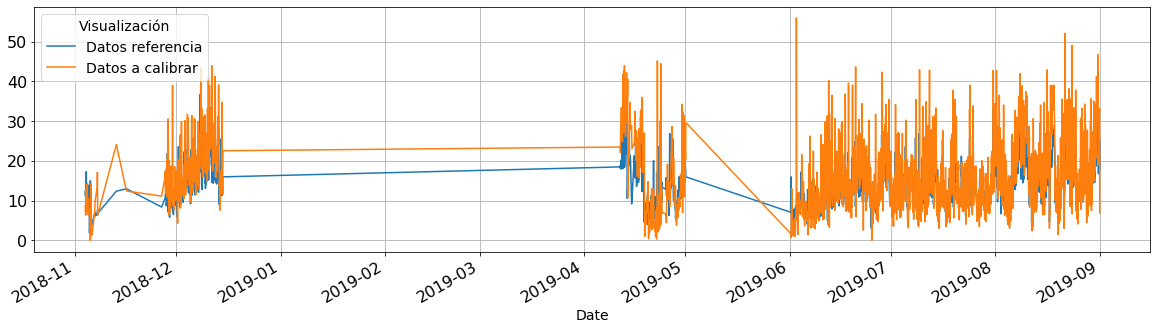

In [3]:
plt.figure(figsize=(20,5))
data["ref"].plot(label="Datos referencia")
data["exp"].plot(label="Datos a calibrar")
plt.legend(title=r"Visualización",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

#### Revisión datos vacíos

In [4]:
total_nan_values = data.isnull().sum().sum()
print (total_nan_values)

nan_rows = data[data.isnull().any(1)]
print(nan_rows)

1
                           ref        exp
datetime                                 
2019-06-20 14:00:00+00:00  NaN  26.916668


In [5]:
# Se eliminan los nan-values
data = data.apply (pd.to_numeric, errors='coerce')
data = data.dropna()

#### Visualización de los datos sin vacíos

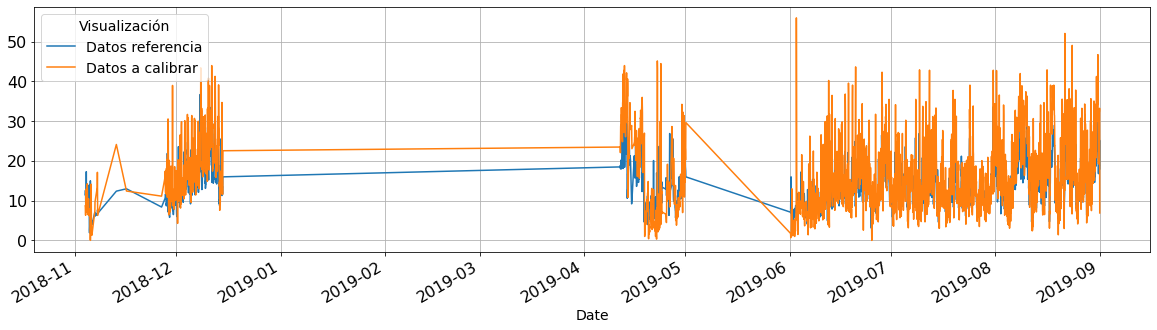

In [6]:
plt.figure(figsize=(20,5))
data["ref"].plot(label="Datos referencia")
data["exp"].plot(label="Datos a calibrar")
plt.legend(title=r"Visualización",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

### Distancia euclidiana entre los datos

In [7]:
def euclidean(ref,exp):
    sd = (data[ref]-data[exp])**2
    distance = np.sqrt(sd.sum())
    return distance

In [8]:
#Distancia euclideana
e0 = euclidean("ref","exp")
e0

404.93345500529125

### Promedio móvil de los datos y distancia euclidiana

###### Ventana de 10 elementos

In [9]:
#Calculamos el tiempo de generación de la ventana
start10 = time.time()
# Ventana móvil central de 5 elementos
data['MV1']=data['exp'].rolling(window=10, center=True).mean()
data['MV1T']=data['ref'].rolling(window=10, center=True).mean()
#Imprimimos el tiempo de generación de la ventana
end10 = time.time()
t10 = end10-start10
print (t10, "segundos")

0.026001930236816406 segundos


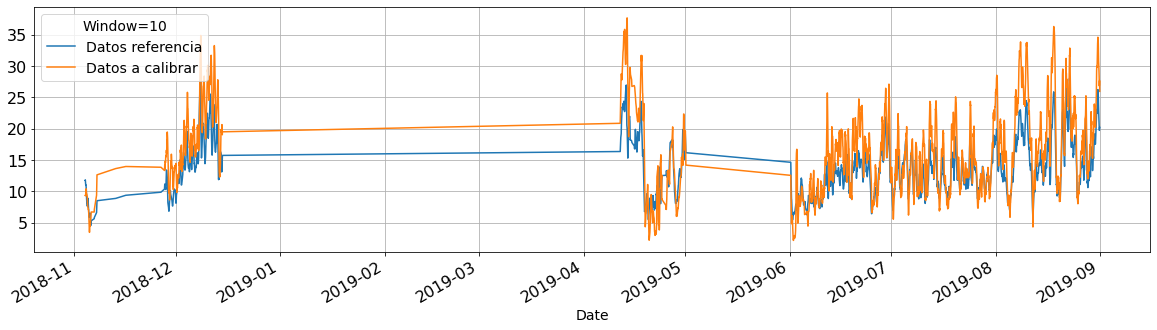

In [10]:
plt.figure(figsize=(20,5))
data["MV1T"].plot(label="Datos referencia")
data["MV1"].plot(label="Datos a calibrar")
plt.legend(title=r"Window=10",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

In [11]:
# Distancia euclideana
e1 = euclidean("MV1","MV1T")
e1

245.79502232070996

##### Ventana móvil de 50 elementos

In [12]:
#Calculamos el tiempo de generación de la ventana
start50 = time.time()
# Ventana móvil central de 50 elementos
data['MV2']=data['exp'].rolling(window=50, center=True).mean()
data['MV2T']=data['ref'].rolling(window=50, center=True).mean()
#Imprimimos el tiempo de generación de la ventana
end50 = time.time()
t50 = end50-start50
print (t50, "segundos")

0.007001399993896484 segundos


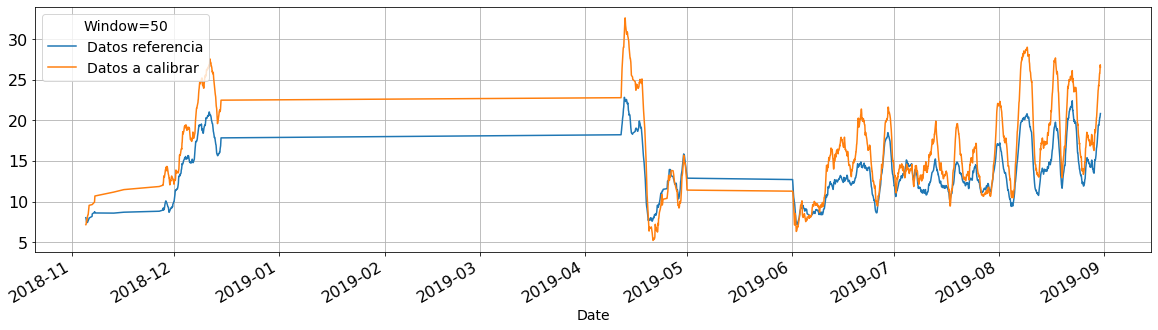

In [13]:
plt.figure(figsize=(20,5))
data["MV2T"].plot(label="Datos referencia")
data["MV2"].plot(label="Datos a calibrar")
plt.legend(title=r"Window=50",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

In [14]:
# Distancia euclideana
e2 = euclidean("MV2","MV2T")
e2

197.90394817114105

##### Ventana móvil de 100 elementos

In [15]:
#Calculamos el tiempo de generación de la ventana
start100 = time.time()
# Ventana móvil central de 100 elementos
data['MV3']=data['exp'].rolling(window=100, center=True).mean()
data['MV3T']=data['ref'].rolling(window=100, center=True).mean()
#Imprimimos el tiempo de generación de la ventana
end100 = time.time()
t100 = end100-start100
print (t100, "segundos")

0.008002281188964844 segundos


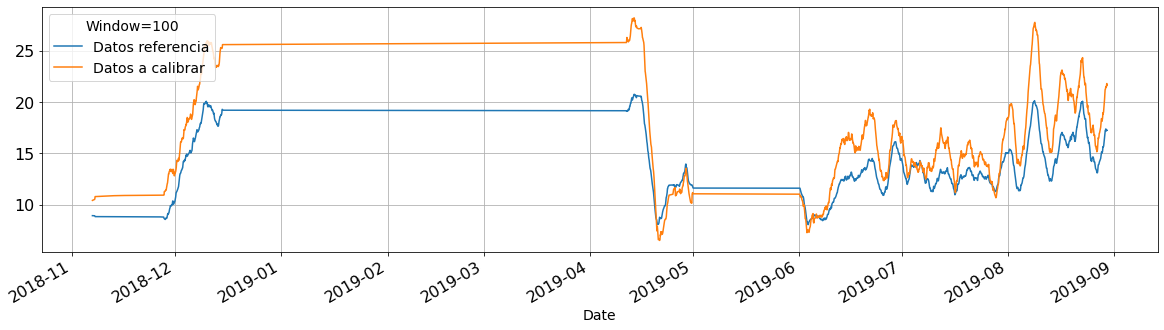

In [16]:
plt.figure(figsize=(20,5))
data["MV3T"].plot(label="Datos referencia")
data["MV3"].plot(label="Datos a calibrar")
plt.legend(title=r"Window=100",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

In [17]:
# Distancia euclideana
e3 = euclidean("MV3","MV3T")
e3

185.68736500486895

##### Ventana móvil de 150 elementos

In [18]:
#Calculamos el tiempo de generación de la ventana
start150 = time.time()
# Ventana móvil central de 150 elementos
data['MV4']=data['exp'].rolling(window=150, center=True).mean()
data['MV4T']=data['ref'].rolling(window=150, center=True).mean()
#Imprimimos el tiempo de generación de la ventana
end150 = time.time()
t150 = end150-start150
print (t150, "segundos")

0.007999658584594727 segundos


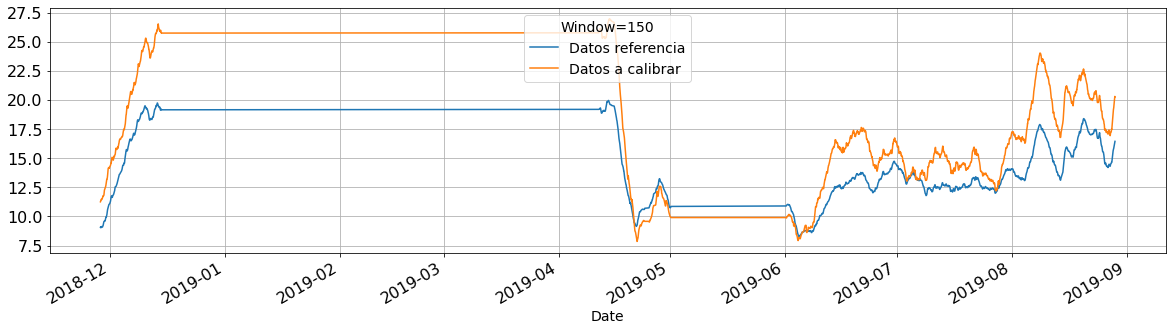

In [19]:
plt.figure(figsize=(20,5))
data["MV4T"].plot(label="Datos referencia")
data["MV4"].plot(label="Datos a calibrar")
plt.legend(title=r"Window=150",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

In [20]:
# Distancia euclideana
e4 = euclidean("MV4","MV4T")
e4

178.1412070361497

##### Ventana móvil de 200 elementos

In [21]:
#Calculamos el tiempo de generación de la ventana
start200 = time.time()
# Ventana móvil central de 200 elementos
data['MV5']=data['exp'].rolling(window=200, center=True).mean()
data['MV5T']=data['ref'].rolling(window=200, center=True).mean()
#Imprimimos el tiempo de generación de la ventana
end200 = time.time()
t200 = end200-start200
print (t200, "segundos")

0.007999181747436523 segundos


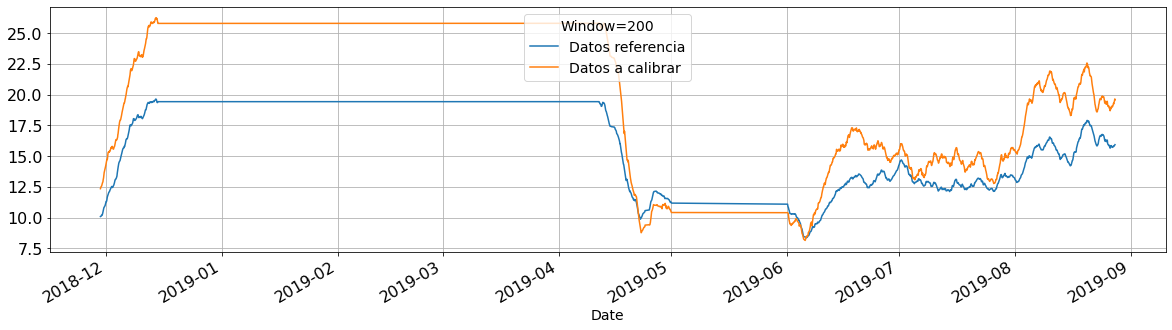

In [22]:
plt.figure(figsize=(20,5))
data["MV5T"].plot(label="Datos referencia")
data["MV5"].plot(label="Datos a calibrar")
plt.legend(title=r"Window=200",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

In [23]:
# Distancia euclideana
e5 = euclidean("MV5","MV5T")
e5

173.2987634981237

##### Ventana móvil de 250 elementos

In [24]:
#Calculamos el tiempo de generación de la ventana
start250 = time.time()
# Ventana móvil central de 250 elementos
data['MV6']=data['exp'].rolling(window=250, center=True).mean()
data['MV6T']=data['ref'].rolling(window=250, center=True).mean()
#Imprimimos el tiempo de generación de la ventana
end250 = time.time()
t250 = end250-start250
print (t250, "segundos")

0.007001399993896484 segundos


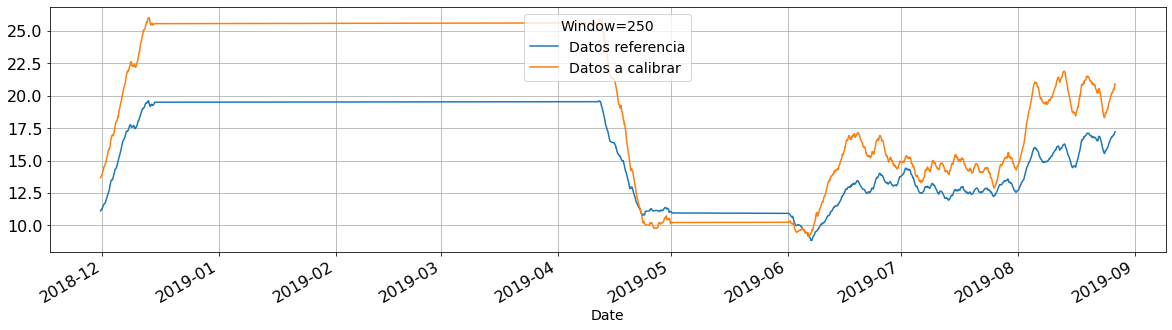

In [25]:
plt.figure(figsize=(20,5))
data["MV6T"].plot(label="Datos referencia")
data["MV6"].plot(label="Datos a calibrar")
plt.legend(title=r"Window=250",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

In [26]:
# Distancia euclideana
e6 = euclidean("MV6","MV6T")
e6

169.072182512107

##### Ventana móvil de 300 elementos

In [27]:
#Calculamos el tiempo de generación de la ventana
start300 = time.time()
# Ventana móvil central de 300 elementos
data['MV7']=data['exp'].rolling(window=300, center=True).mean()
data['MV7T']=data['ref'].rolling(window=300, center=True).mean()
#Imprimimos el tiempo de generación de la ventana
end300 = time.time()
t300 = end300-start300
print (t300, "segundos")

0.007002592086791992 segundos


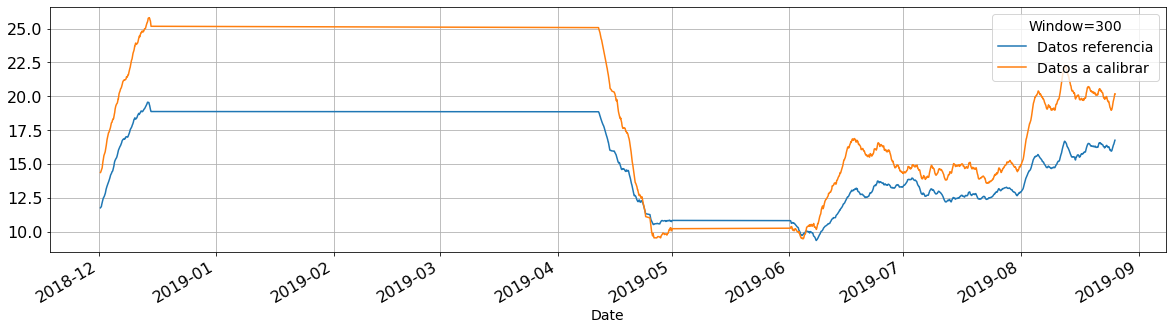

In [28]:
plt.figure(figsize=(20,5))
data["MV7T"].plot(label="Datos referencia")
data["MV7"].plot(label="Datos a calibrar")
plt.legend(title=r"Window=300",fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

In [29]:
# Distancia euclideana
e7 = euclidean("MV7","MV7T")
e7

164.6413582140641

##### Comparación de ventanas móviles

In [30]:
wvalues = [0,10,50,100,150,200,250,300]
evalues = [e0,e1,e2,e3,e4,e5,e6,e7]

wtvalues = [10,50,100,150,200,250,300]
tvalues = [t10,t50,t100,t150,t200,t250,t300]

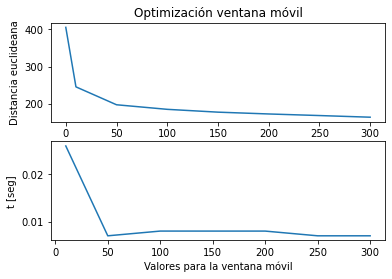

In [31]:
plt.subplot(2, 1, 1)
plt.plot(wvalues,evalues)
plt.ylabel('Distancia euclideana')
plt.xlabel('Valores para la ventana móvil')
plt.title('Optimización ventana móvil')

plt.subplot(2, 1, 2)
plt.plot(wtvalues,tvalues)
plt.ylabel('t [seg]')
plt.xlabel('Valores para la ventana móvil')

plt.show()

El valor óptimo de la ventana móvil para ser trabajada es de **100 datos**

### Calibración usando Random Forest

In [32]:
# Carga de librerías
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.externals import joblib 
from sklearn.preprocessing import LabelEncoder 
from numpy.core.umath_tests import inner1d

In [33]:
# Se carga las columnas correspondientes a la ventana móvil de 100 elementos
dataMV = data.iloc[:,6:8]
dataMV

,MV3,MV3T
datetime,,
2018-11-03 23:00:00+00:00,NaN,NaN
2018-11-04 00:00:00+00:00,NaN,NaN
2018-11-04 01:00:00+00:00,NaN,NaN
2018-11-04 02:00:00+00:00,NaN,NaN
2018-11-04 03:00:00+00:00,NaN,NaN
...,...,...
2019-08-31 19:00:00+00:00,NaN,NaN
2019-08-31 20:00:00+00:00,NaN,NaN
2019-08-31 21:00:00+00:00,NaN,NaN


In [34]:
# Se eliminan los datos vacíos

dataMV = dataMV.apply (pd.to_numeric, errors='coerce')
dataMV = dataMV.dropna()

dataMV

,MV3,MV3T
datetime,,
2018-11-06 21:00:00+00:00,10.404849,8.916
2018-11-07 13:00:00+00:00,10.505186,8.905
2018-11-07 14:00:00+00:00,10.594750,8.883
2018-11-07 15:00:00+00:00,10.678510,8.853
2018-11-07 16:00:00+00:00,10.777895,8.823
...,...,...
2019-08-29 18:00:00+00:00,21.566667,17.202
2019-08-29 19:00:00+00:00,21.731667,17.239
2019-08-29 20:00:00+00:00,21.761667,17.284


In [35]:
X = pd.DataFrame(dataMV["MV3"])
Y = dataMV["MV3T"]

In [36]:
train_features,test_features,train_labels,test_labels=train_test_split(X,Y,test_size=0.5,random_state=0)
# Instantiate model with 1000 decision trees
rf=RandomForestRegressor(n_estimators=1000,random_state=0,max_features="sqrt",criterion="mse")
# Train the model on training data
rf.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
rmse=np.sqrt(np.mean(errors**2))
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)
print('RMSE:', rmse)

Mean Absolute Error: 0.7436368860899036
Accuracy: 94.17065325740188
RMSE: 0.9930041319623893


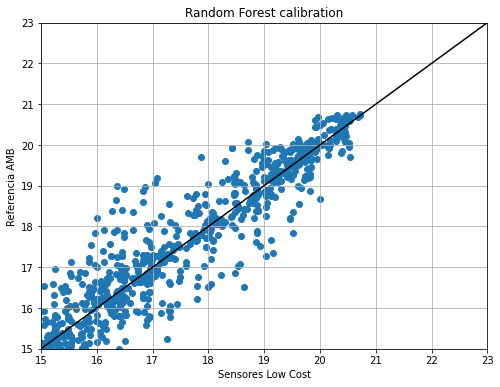

In [37]:
plt.figure(figsize=(8,6))
#axe=np.linspace(data[station].min()-0.2,data[station].max()+0.2,10)
plt.scatter(rf.predict(X),dataMV["MV3T"],label='',lw=1,marker='o') 
x=np.linspace(15,100,10)
plt.plot(x,x,'k-')
plt.ylabel("Referencia AMB")
plt.xlabel("Sensores Low Cost")
plt.ylim(15,23)
plt.xlim(15,23)
plt.grid()
plt.title("Random Forest calibration")
plt.show()

In [38]:
datahelp = dataMV.reset_index()
tiempo = datahelp['datetime']
tiempo = pd.DataFrame(tiempo)

pre = pd.DataFrame(rf.predict(X))

In [39]:
prediction = pd.concat([tiempo, pre], axis=1)
prediction.set_index("datetime", inplace=True)
prediction.columns=['Calibración']

prediction.head()

,Calibración
datetime,
2018-11-06 21:00:00+00:00,9.597719
2018-11-07 13:00:00+00:00,10.516346
2018-11-07 14:00:00+00:00,9.663474
2018-11-07 15:00:00+00:00,9.863437
2018-11-07 16:00:00+00:00,11.751329


In [40]:
dataFinal = pd.merge(dataMV, prediction, left_index=True, right_index=True)

dataFinal.head()

,MV3,MV3T,Calibración
datetime,,,
2018-11-06 21:00:00+00:00,10.404849,8.916,9.597719
2018-11-07 13:00:00+00:00,10.505186,8.905,10.516346
2018-11-07 14:00:00+00:00,10.594750,8.883,9.663474
2018-11-07 15:00:00+00:00,10.678510,8.853,9.863437
2018-11-07 16:00:00+00:00,10.777895,8.823,11.751329


#### Visualización de los datos calibrados

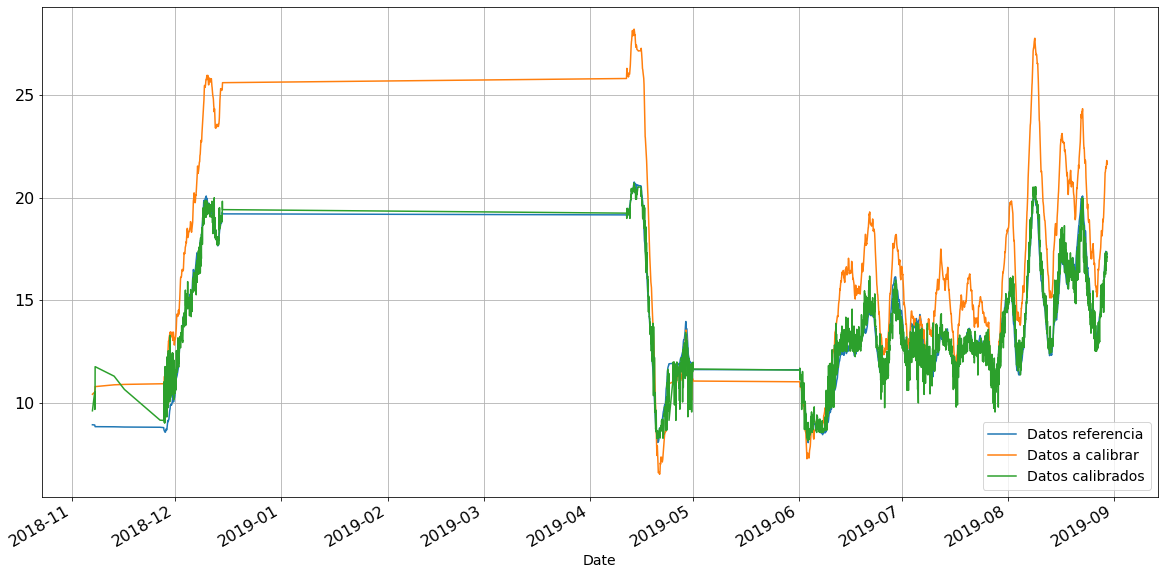

In [41]:
plt.figure(figsize=(20,10))
dataFinal["MV3T"].plot(label="Datos referencia")
dataFinal["MV3"].plot(label="Datos a calibrar")
dataFinal["Calibración"].plot(label="Datos calibrados")
plt.legend(fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

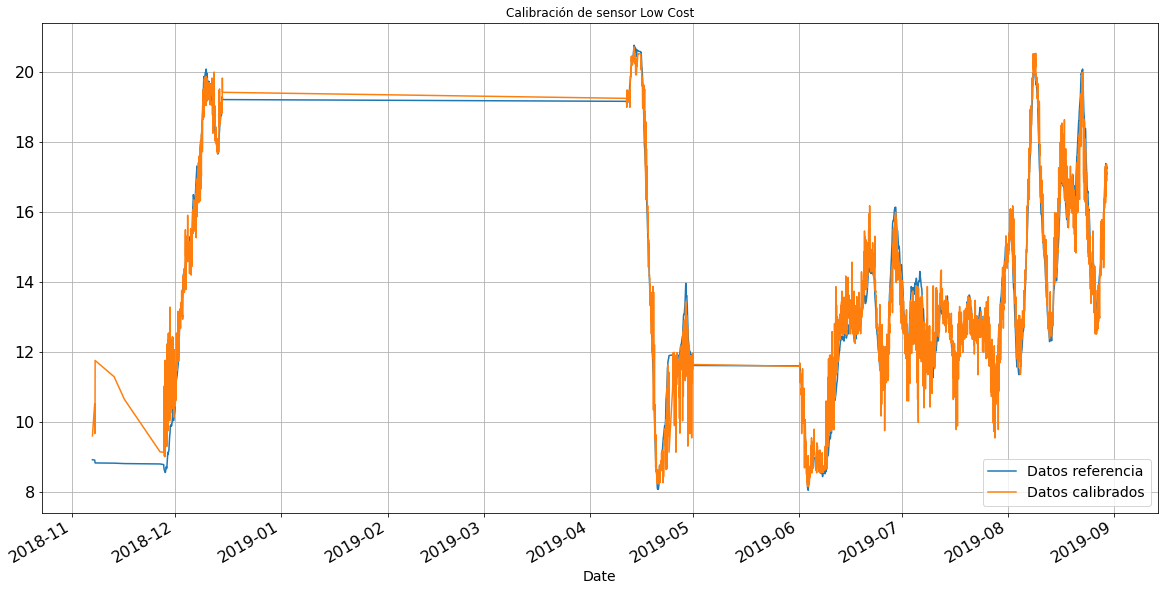

In [42]:
plt.figure(figsize=(20,10))
dataFinal["MV3T"].plot(label="Datos referencia")
dataFinal["Calibración"].plot(label="Datos calibrados")
plt.legend(fontsize=14,title_fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Calibración de sensor Low Cost')
plt.grid()
plt.show()

#### Comparación por distancia euclideana

In [43]:
# Se define la función de la distancia euclideana
def euclidean1(a,b):
    sd = (dataFinal[a]-dataFinal[b])**2
    distance = np.sqrt(sd.sum())
    return distance

In [44]:
# Como los datos son numéricos se capturan como números
for c in dataFinal.columns:
    dataFinal[c] = pd.to_numeric(dataFinal[c], errors='coerce')

In [45]:
ec = euclidean1('MV3T','Calibración')
porcentaje = 100 - ec*100/e3

print('Distancia euclideana entre los datos de referencia y los datos calibrados:',ec,'\nDistancia entre los datos de referencia y los originales', e3, '\nPorcentaje de reducción respecto a la distancia inicial: %', porcentaje)


Distancia euclideana entre los datos de referencia y los datos calibrados: 40.679137779549194 
Distancia entre los datos de referencia y los originales 185.68736500486895 
Porcentaje de reducción respecto a la distancia inicial: % 78.09267325297952
